In [1]:
import numpy as np
import pandas as pd
import PySAM.Pvsamv1 as pv

import matplotlib.pyplot as plt

In [2]:
pvmodel = pv.default('PVBatteryResidential')

In [3]:
# there are formatting differences between the weather file that we download from
# pvwatts and what SAM wants --- SAM wants the file from the NSRDB 
pvmodel.SolarResource.solar_resource_file = "../data/tmy_5.579_-0.233_2005_2014.epw"

In [4]:
our_load_profile = np.loadtxt("../data/Max_load_profile_for_year.txt", skiprows=1)

In [5]:
pvmodel.Load.load = tuple(our_load_profile)

In [30]:
pvmodel.Module.module_model = 1 # set it to simple efficiency model

In [25]:
pvmodel.SimpleEfficiencyModuleModel.assign({'spe_eff0': 20,
 'spe_eff1': 20,
 'spe_eff2': 20,
 'spe_eff3': 20,
 'spe_eff4': 20,})
pvmodel.SimpleEfficiencyModuleModel.export()

{'spe_a': -3.56,
 'spe_area': 0.74074,
 'spe_b': -0.075,
 'spe_bifacial_ground_clearance_height': 1.0,
 'spe_bifacial_transmission_factor': 0.013,
 'spe_bifaciality': 0.65,
 'spe_dT': 3.0,
 'spe_eff0': 20.0,
 'spe_eff1': 20.0,
 'spe_eff2': 20.0,
 'spe_eff3': 20.0,
 'spe_eff4': 20.0,
 'spe_fd': 1.0,
 'spe_is_bifacial': 0.0,
 'spe_module_structure': 0.0,
 'spe_rad0': 200.0,
 'spe_rad1': 400.0,
 'spe_rad2': 600.0,
 'spe_rad3': 800.0,
 'spe_rad4': 1000.0,
 'spe_reference': 4.0,
 'spe_temp_coeff': -0.5,
 'spe_vmp': 30.0,
 'spe_voc': 36.0}

In [12]:
# inverter settings 
pvmodel.Inverter.export()

{'inv_cec_cg_eff_cec': 96.6364,
 'inv_cec_cg_paco': 3800.0,
 'inv_ds_eff': 96.0,
 'inv_ds_paco': 4000.0,
 'inv_num_mppt': 1.0,
 'inv_pd_eff': 95.0,
 'inv_pd_paco': 4000.0,
 'inv_snl_eff_cec': 97.0531,
 'inv_snl_paco': 3850.0,
 'inverter_count': 1.0,
 'inverter_model': 0.0,
 'mppt_hi_inverter': 480.0,
 'mppt_low_inverter': 100.0}

In [16]:
pvmodel.Inverter.inverter_model = 0. # set it to CEC

0.0

In [14]:
pvmodel.InverterCECDatabase.export()

{'inv_snl_c0': -3.08138e-06,
 'inv_snl_c1': -4.8e-05,
 'inv_snl_c2': 0.000124,
 'inv_snl_c3': -0.001632,
 'inv_snl_paco': 3850.0,
 'inv_snl_pdco': 3964.41,
 'inv_snl_pnt': 1.155,
 'inv_snl_pso': 17.8856,
 'inv_snl_vdcmax': 480.0,
 'inv_snl_vdco': 400.0,
 'inv_tdc_cec_db': ((1.0, 52.8, -0.021),)}

In [81]:
# System Design
pvmodel.SystemDesign.inverter_count = 10.
pvmodel.SystemDesign.subarray1_modules_per_string = 10.
pvmodel.SystemDesign.subarray1_nstrings = 10.

In [82]:
pvmodel.execute()

<BarContainer object of 12 artists>

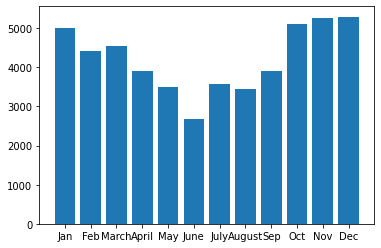

In [83]:
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, pvmodel.Outputs.monthly_energy)

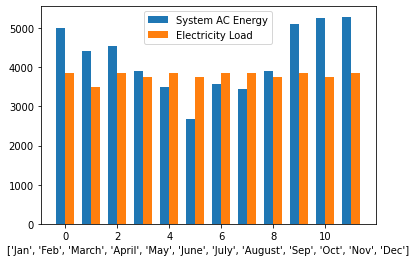

In [84]:
dates = pd.date_range(start="1/1/2006", end="1/1/2007", freq="H").delete(-1)

hourly_load_w_dates = pd.DataFrame({"Load" : pvmodel.Load.load, "Dates" : dates})
monthly_load = hourly_load_w_dates.groupby(hourly_load_w_dates["Dates"].dt.month)["Load"].sum()

months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]

x = np.arange(len(months))  # the label locations
width = 0.35  # the width of the bars

f, ax = plt.subplots()
ax.bar(x - width/2, pvmodel.Outputs.monthly_energy, width, label="System AC Energy")
ax.bar(x + width/2, monthly_load.values, width, label="Electricity Load")
ax.set_xlabel(months)
plt.legend();

In [80]:
diff_of_energy_load = pvmodel.Outputs.monthly_energy - monthly_load.values

diff_of_energy_load

array([   28.3161802 ,   -62.97232439,  -183.51875902,  -459.90770752,
        -710.99404511, -1171.36193788,  -560.86125858,  -727.69156526,
        -386.26669839,   115.46397126,   178.95305009,   159.32760949])